# Assignment 2

## Exercise 1

In [1]:
import wrds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [3]:
db = wrds.Connection()
db.create_pgpass_file()

Enter your WRDS username [felicity]:alina925
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [4]:
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='1999-12-31' and date<='2020-12-31'")
aapl.to_csv('aapl.csv')

gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='1999-12-31' and date<='2020-12-31'")
gs.to_csv('gs.csv')

msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='1999-12-31' and date<='2020-12-31'")
msft.to_csv('msft.csv')

pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='1999-12-31' and date<='2020-12-31'")
pg.to_csv('pg.csv')

ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='1999-12-31' and date<='2020-12-31'")
ge.to_csv('ge.csv')

In [5]:
aapl = pd.read_csv('aapl.csv', index_col=0)
gs = pd.read_csv('gs.csv', usecols=['ret']).squeeze()
msft = pd.read_csv('msft.csv', usecols=['ret']).squeeze()
pg = pd.read_csv('pg.csv', usecols=['ret']).squeeze()
ge = pd.read_csv('ge.csv', usecols=['ret']).squeeze()

#### a)

In [6]:
aapl.date = pd.to_datetime(aapl.date)
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'gs':gs,
                   'msft':msft, 'pg':pg, 'ge':ge})
ret = ret.set_index('date')

print('Mean of daily returns:',ret.apply(np.mean),sep='\n')
print('\nStd of daily returns:',ret.apply(np.std),sep='\n')

Mean of daily returns:
aapl    0.001317
gs      0.000522
msft    0.000526
pg      0.000378
ge      0.000046
dtype: float64

Std of daily returns:
aapl    0.025622
gs      0.023606
msft    0.019470
pg      0.013628
ge      0.021166
dtype: float64


#### b)

##### AAPL

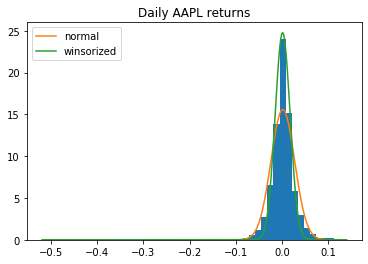

In [7]:
N = len(ret)
aapl = ret.aapl
aapl_w = aapl[:]
aapl_w = aapl_w.where(np.abs(aapl_w)<0.04)

x = np.linspace(aapl.min(), aapl.max(), N)

plt.title('Daily AAPL returns')
plt.hist(aapl, bins=50, density=True);
plt.plot(x, norm.pdf(x, aapl.mean(), aapl.std()), label='normal');
plt.plot(x, norm.pdf(x, aapl_w.mean(), aapl_w.std()), label='winsorized');
plt.legend();

##### GS

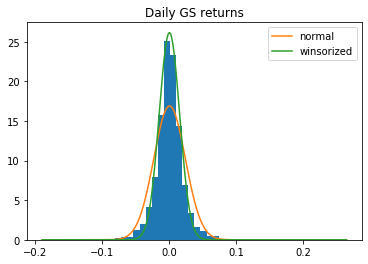

In [8]:
gs_w = gs[:]
gs_w = gs_w.where(np.abs(gs_w)<0.04)

x = np.linspace(gs.min(), gs.max(), N)

plt.title('Daily GS returns')
plt.hist(gs, bins=50, density=True);
plt.plot(x, norm.pdf(x, gs.mean(), gs.std()), label='normal');
plt.plot(x, norm.pdf(x, gs_w.mean(), gs_w.std()), label='winsorized');
plt.legend();

##### MSFT

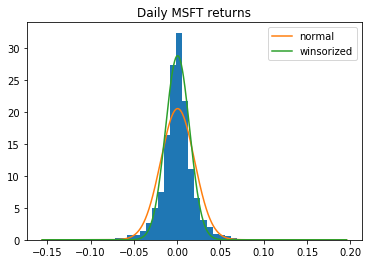

In [9]:
msft_w = msft[:]
msft_w = msft_w.where(np.abs(msft_w)<0.04)

x = np.linspace(msft.min(), msft.max(), N)

plt.title('Daily MSFT returns')
plt.hist(msft, bins=50, density=True);
plt.plot(x, norm.pdf(x, msft.mean(), msft.std()), label='normal');
plt.plot(x, norm.pdf(x, msft_w.mean(), msft_w.std()), label='winsorized');
plt.legend();

##### PG

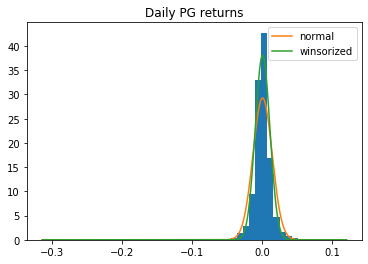

In [10]:
pg_w = pg[:]
pg_w = pg_w.where(np.abs(pg_w)<0.04)

x = np.linspace(pg.min(), pg.max(), N)

plt.title('Daily PG returns')
plt.hist(pg, bins=50, density=True);
plt.plot(x, norm.pdf(x, pg.mean(), pg.std()), label='normal');
plt.plot(x, norm.pdf(x, pg_w.mean(), pg_w.std()), label='winsorized');
plt.legend();

##### GE

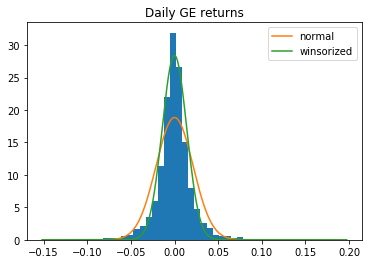

In [11]:
ge_w = ge[:]
ge_w = ge_w.where(np.abs(ge_w)<0.04)

x = np.linspace(ge.min(), ge.max(), N)

plt.title('Daily GE returns')
plt.hist(ge, bins=50, density=True);
plt.plot(x, norm.pdf(x, ge.mean(), ge.std()), label='normal');
plt.plot(x, norm.pdf(x, ge_w.mean(), ge_w.std()), label='winsorized');
plt.legend();

#### c)

In [12]:
print('95% VaR (in %):',ret.quantile(.05)*(-100),sep='\n')
print('\n99% VaR (in %):',ret.quantile(.01)*(-100),sep='\n')

95% VaR (in %):
aapl    3.762551
gs      3.371767
msft    2.869881
pg      1.775496
ge      3.134519
Name: 0.05, dtype: float64

99% VaR (in %):
aapl    6.450919
gs      6.317046
msft    5.467889
pg      3.608454
ge      6.081851
Name: 0.01, dtype: float64


In [13]:
var95 = ret.quantile(.05)
var99 = ret.quantile(.01)
k = ret.shape[1]

esf95 = [0 for i in range(k)]
esf99 = [0 for i in range(k)]
 
for i in range(k):
    sf95 = ret.iloc[:,i].where(ret.iloc[:,i]<var95[i])
    esf95[i] = np.mean(sf95)*(-100)
    sf99 = ret.iloc[:,i].where(ret.iloc[:,i]<var99[i])
    esf99[i] = np.mean(sf99)*(-100)

Esf95 = pd.DataFrame(columns=ret.columns)
Esf95.loc[0] = esf95
Esf99 = pd.DataFrame(columns=ret.columns)
Esf99.loc[0] = esf99

#Esf95.Index.rename('95')
print('95% Expected Shortfall (in %):',Esf95,sep='\n')
print('\n99% Expected Shortfall (in %):',Esf99,sep='\n')

95% Expected Shortfall (in %):
       aapl        gs      msft     pg        ge
0  5.700202  5.283197  4.504708  3.164  5.015128

99% Expected Shortfall (in %):
      aapl        gs      msft        pg        ge
0  9.50909  9.213828  7.675747  5.901506  8.440496


#### d)

The normal distribution does not seem to approprietely describe the distribution of daily stock returns since the latter's kurtosis is far greater that that of a normal distribution. However, by removing extreme values from daily stock returns and reparametrizing the normal distribution with the parameters estimated from that reduced sample, the goodness of fit of the normal seems to improve towards the center, though daily returns leptokurticity increases since the standard deviation of the winsorized normal is reduced.

There seems therefore to be a tradeoff between goodness of fit around the center and leptokurticity, when trying to fit a normal distribution to returns.

#### e)

In [14]:
bonds=db.raw_sql("select caldt, b2ret, b10ret from crsp.mcti where caldt>='1999-12-31' and caldt<='2020-12-31'", date_cols=['caldt'])

# see: https://wrds-www.wharton.upenn.edu/documents/1443/wrds_connection.html
bonds=bonds.rename(columns= {"caldt": "date"})
bonds.to_csv('bonds.csv')

bonds = pd.read_csv('bonds.csv', index_col=0)

In [31]:
bonds = pd.read_csv('bonds.csv', index_col=0)
bonds = bonds.set_index('date')

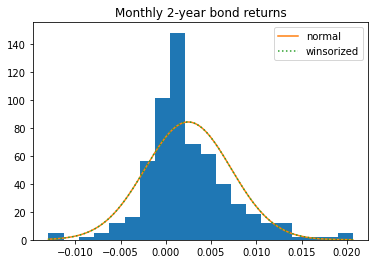

In [30]:
N = len(bonds)
b2ret = bonds.b2ret
b2ret_w = b2ret[:]
b2ret_w = b2ret_w.where(np.abs(b2ret_w)<0.04)

x = np.linspace(b2ret.min(), b2ret.max(), N)

plt.title('Monthly 2-year bond returns')
plt.hist(b2ret, bins=20, density=True);
plt.plot(x, norm.pdf(x, b2ret.mean(), b2ret.std()), label='normal');
plt.plot(x, norm.pdf(x, b2ret_w.mean(), b2ret_w.std()), label='winsorized', ls=':');
plt.legend();

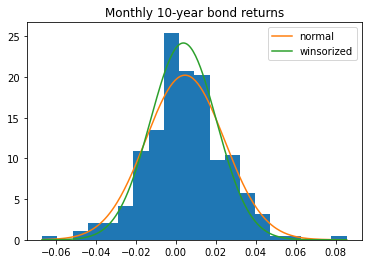

In [27]:
b10ret = bonds.b10ret
b10ret_w = b10ret[:]
b10ret_w = b10ret_w.where(np.abs(b10ret_w)<0.04)

x = np.linspace(b10ret.min(), b10ret.max(), N)

plt.title('Monthly 10-year bond returns')
plt.hist(b10ret, bins=20, density=True);
plt.plot(x, norm.pdf(x, b10ret.mean(), b10ret.std()), label='normal');
plt.plot(x, norm.pdf(x, b10ret_w.mean(), b10ret_w.std()), label='winsorized');
plt.legend();

Since there are no returns greater than 0.04 in absolute value for the 2-year bond, the normal and the winsorized normal are exactly the same. Therefore, both do not account well for the excess kurtosis also observed in bond returns. In addition, the 2-year bond returns seem to be positively skewed, which obviously is never captured by a normal distribution.

Skewness for the 10-year bond returns seems to be less than that of the 2-year. However, the same conclusion about the above-mentionned tradeoff for stock returns can be applied for the 10-year bond.

## Exercise 2

In [33]:
# Download data
aapl1=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2010-01-01' and date<='2020-12-31'")
aapl1.to_csv('aapl1.csv')

pg1=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2010-01-01' and date<='2020-12-31'")
pg1.to_csv('pg1.csv')

del aapl
del pg

aapl = pd.read_csv('aapl1.csv', index_col=0)
pg = pd.read_csv('pg1.csv', usecols=['ret']).squeeze()

# convert date string to datetime
aapl.date = pd.to_datetime(aapl.date)

# concatenate series into one dataframe
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'pg':pg})

# set datetime as pd index
ret = ret.set_index('date')

NameError: name 'db' is not defined

In [36]:
aapl = pd.read_csv('aapl1.csv', index_col=0)
pg = pd.read_csv('pg1.csv', usecols=['ret']).squeeze()
aapl.date = pd.to_datetime(aapl.date)
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'pg':pg})
ret = ret.set_index('date')

#### a)

In [37]:
ret_w = ret.resample('W').sum()
ret_w.describe()

,aapl,pg
count,574.000000,574.000000
mean,0.006027,0.002321
std,0.038903,0.021783
min,-0.180304,-0.110265
25%,-0.017382,-0.009292
50%,0.007690,0.002472
75%,0.029414,0.014700
max,0.143230,0.111966


In [44]:
# expected return
e_ret_aapl = ret_w.mean().aapl * 52
e_ret_pg = ret_w.mean().pg * 52

#std
std_aapl = ret_w.std().aapl * np.sqrt(52)
std_pg = ret_w.std().pg * np.sqrt(52)

#correlation
x = ret_w["aapl"]
y = ret_w["pg"]
coeff = x.corr(y)

print("The expected return of Apple is ", e_ret_aapl, "standard deviation is", std_aapl, "\n")
print("The expected return of P&G is ", e_ret_pg, "standard deviation is", std_pg, "\n")
print("The correlation is", coeff, "\n")

[[0.07869932 0.01413473]
 [0.01413473 0.0246748 ]]
The expected return of Apple is  0.31341867549221086 standard deviation is 0.28053399340649265 

The expected return of P&G is  0.12071312071235409 standard deviation is 0.1570821389597668 

The correlation is 0.3207562042229808 



#### b)

In [62]:
# set portfolio weights (also including leverage)
w = np.arange(-0.5,1.6,0.1)

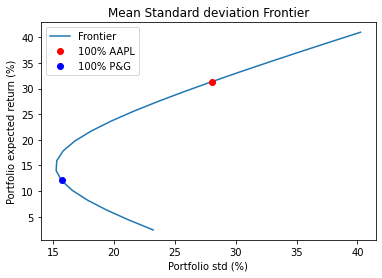

In [63]:
# calculate portfolio return and std
r_p = w * e_ret_aapl + (1-w) * e_ret_pg
std_p = np.sqrt((w*std_aapl)**2 + (1-w)**2*std_pg**2 + 2*w*(1-w)*coeff*std_aapl*std_pg)

#plot
plt.plot(std_p*100,r_p*100,label="Frontier")
plt.xlabel('Portfolio std (%)')
plt.ylabel('Portfolio expected return (%)')
plt.title('Mean Standard deviation Frontier')
plt.plot(std_aapl*100,e_ret_aapl*100,"ro", label="100% AAPL")
plt.plot(std_pg*100,e_ret_pg*100,"bo", label="100% P&G")
plt.legend()
plt.show()

#### c)

In [47]:
# to minimize variance
w_min = (std_pg**2 - coeff*std_aapl*std_pg)/(std_aapl**2 + std_pg**2 - 2*coeff*std_aapl*std_pg)

wmin_r_p = w_min * e_ret_aapl + (1-w_min) * e_ret_pg
wmin_std_p = np.sqrt((w_min*std_aapl)**2 + (1-w_min)**2*std_pg**2 + 2*w_min*(1-w_min)*coeff*std_aapl*std_pg)

rf = 0.015
sh = (wmin_r_p - rf)/wmin_std_p

print("The minimum variance portfolio is composed of " ,w_min*100, "% of Apple, and " ,(1-w_min)*100, "% of P&G\n")
print("The expected return is ", wmin_r_p, " The std is ", wmin_std_p, "\n")
print("The Sharpe Ratio is ", sh)



The minimum variance portfolio is composed of  14.033845496617973 % of Apple, and  85.96615450338203 % of P&G

The expected return is  0.14775712053355972  The std is  0.15230108593641672 

The Sharpe Ratio is  0.8716754691360749


#### d)

In [85]:
# Cov matrix
cov_xy = coeff*std_aapl*std_pg
Cov = np.diag([std_aapl**2,std_pg**2])
Cov[0,1] = cov_xy
Cov[1,0] = cov_xy
Cov_inv = np.linalg.inv(Cov)

# Excess mean return vector
mu = np.asarray([e_ret_aapl, e_ret_pg]) - rf

# Tangency portfolio weights (t)
a = np.matmul(Cov_inv,mu)
t = a/a.sum()

# Capital market line
tpf_mu = np.dot(t,mu)
tpf_var = np.matmul(t,Cov)
tpf_var = np.matmul(tpf_var,t)
tpf_std = np.sqrt(tpf_var)
print(tpf_mu,tpf_var)

slope = (tpf_mu - rf)/tpf_std

tpf_x = np.arange(0,40,0.1)
tpf_y = np.empty(len(tpf_x))
for i in range(len(tpf_y)):
    tpf_y[i] = rf + tpf_x[i]*slope



0.21914835948268285 0.038290091108651475


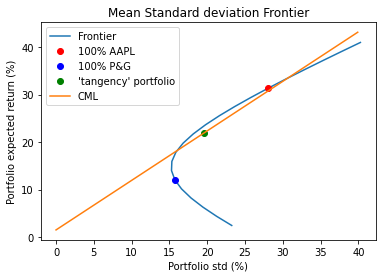

In [91]:
#plot
plt.plot(std_p*100,r_p*100,label="Frontier")
plt.xlabel('Portfolio std (%)')
plt.ylabel('Portfolio expected return (%)')
plt.title('Mean Standard deviation Frontier')
plt.plot(std_aapl*100,e_ret_aapl*100,"ro", label="100% AAPL")
plt.plot(std_pg*100,e_ret_pg*100,"bo", label="100% P&G")
plt.plot(tpf_std,tpf_mu*100,'go', label="'tangency' portfolio")
plt.plot(tpf_x,tpf_y*100, label="CML")
plt.plot(0,rf*100)


plt.legend()
plt.show()

#### e)

In [22]:
from sympy import symbols, solve

In [23]:
# check that the result from solver function is real number
def goodnumber(str):
    try: 
        float(str)
    except TypeError: 
        return False
    return True

In [24]:
# std = 0.2
w1opt = np.zeros(0)
w2opt = np.zeros(0)

for ii in range(1001):
    w1 = ii/1000
    x = symbols('x')
    expr = (w1*std_aapl)**2 + x**2*std_pg**2 + 2*w1*x*coeff*std_aapl*std_pg - 0.2**2
    w2 = solve(expr)
    
    if goodnumber(w2[1]):
        if w1 + w2[1] < 1:
            temp = w2[1]
            w1opt = np.concatenate((w1opt,np.ones(1)*w1))
            w2opt = np.concatenate((w2opt,np.ones(1)*temp))
       

In [25]:
# maximize return with given std
mixr_p = w1opt*e_ret_aapl + w2opt*e_ret_pg + (1-w1opt-w2opt)*rf
maxret = np.amax(mixr_p)
index = np.where(mixr_p == maxret)

print("The optimal weight of Apple is ", w1opt[index]*100, "%\n")
print("The optimal weight of P&G is ", w2opt[index]*100, "%\n")
print("The optimal weight of the risk free is" ,(1-w1opt[index]-w2opt[index])*100, "%\n")

The optimal weight of Apple is  [61.4] %

The optimal weight of P&G is  [38.4742323847997] %

The optimal weight of the risk free is [0.125767615200301] %



In [26]:
# compute risk aversion coefficient
## From the First Order Conditions deriving for Apple:
a = (e_ret_aapl-rf)/(w1opt[index]*std_aapl**2 + w2opt[index]*coeff*std_aapl*std_pg)
print("The value of the risk aversion coefficient is", a)

The value of the risk aversion coefficient is [5.55098285806344]


#### f)

In [27]:
sharpe = (maxret - rf)/0.2
print("The mean is", maxret, "\nThe Sharpe ratio is", sharpe)


The mean is 0.238901378476313 
The Sharpe ratio is 1.11950689238157
